In [1]:
from matplotlib.ticker import FuncFormatter
import pandas as pd

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY1, GRAY2, GRAY3

In [2]:
df = pd.read_csv("gov_rd_agency.csv", thousands=",", index_col=0)
df.dropna(inplace=True)
df.columns = [int(c) for c in df.columns]
df = df / 1000

defense_cols = ['DOD', 'DHS']
df.loc['Defense & Security (DOD/DHS)'] = df.loc[defense_cols].sum()

health_cols = ['HHS', 'NIH*', 'VA']
df.loc['Health (HHS/NIH/VA)'] = df.loc[health_cols].sum()

other_cols = ['NASA', 'DOE', 'USDA', 'Interior', 'DOT', 'EPA', 'DOC', 'Other ']
df.loc['Other Departments'] = df.loc[other_cols].sum()

drops = defense_cols + health_cols + other_cols
df.drop(index=drops, inplace=True)

df.rename(index={'NSF': 'Sciences (NSF)'}, inplace=True)

start_year = 2017
df = df.loc[:,start_year:]

df_indexed = df.copy()
df_indexed.drop(index=['Other Departments'], inplace=True)
for year in reversed(df_indexed.columns):
    df_indexed[year] = df_indexed[year] / df_indexed[start_year]
    
df_indexed

,2017,2018,2019,2020,2021,2022,2023
Sciences (NSF),1.0,1.044877,1.072040,1.033215,1.109389,1.056687,1.247121
Defense & Security (DOD/DHS),1.0,1.195104,1.224805,1.332234,1.248561,1.370506,1.461290
Health (HHS/NIH/VA),1.0,1.058756,1.086775,1.195490,1.092390,1.164754,1.287880


<Figure size 3740x1496 with 0 Axes>

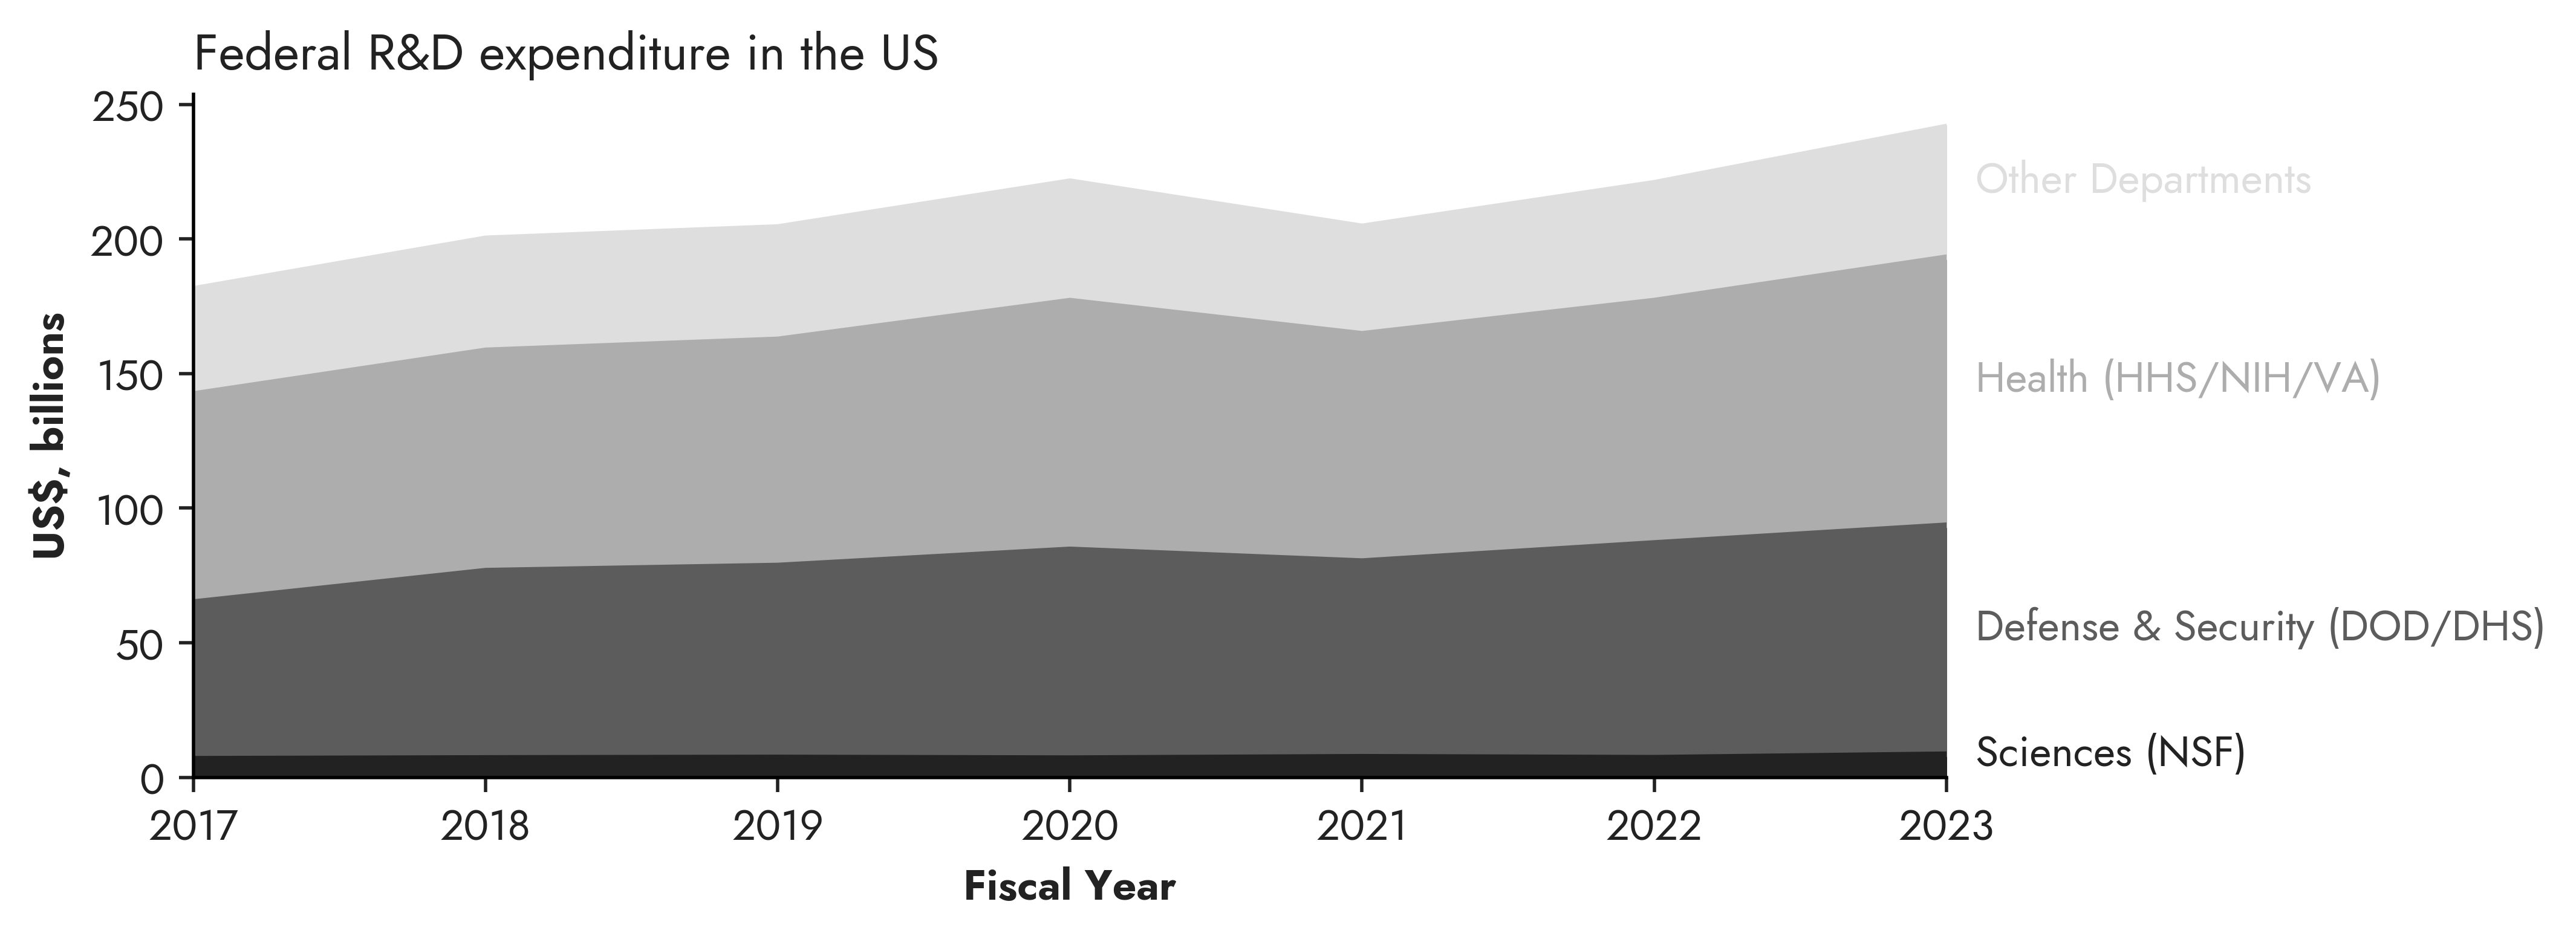

In [7]:
plt = prep_plot()
fig, ax = plt.subplots()

colors = [BLACK, GRAY1, GRAY2, GRAY3]
df.T.plot(kind='area', ax=ax, color=colors, legend=False)
ax.set_xlim(start_year, 2023)

y = 0
for i, (cat, val) in enumerate(df[2023].items()):
    ax.text(s=cat, x=2023.1, y=(y+val/2), color=colors[i])
    y += val

ax.set_xlabel("Fiscal Year", weight='bold')
ax.set_ylabel("US$, billions", weight='bold')
ax.set_title("Federal R&D expenditure in the US", loc='left')

plt.savefig("gov_rd_agency.png", bbox_inches="tight")

<Figure size 3740x1496 with 0 Axes>

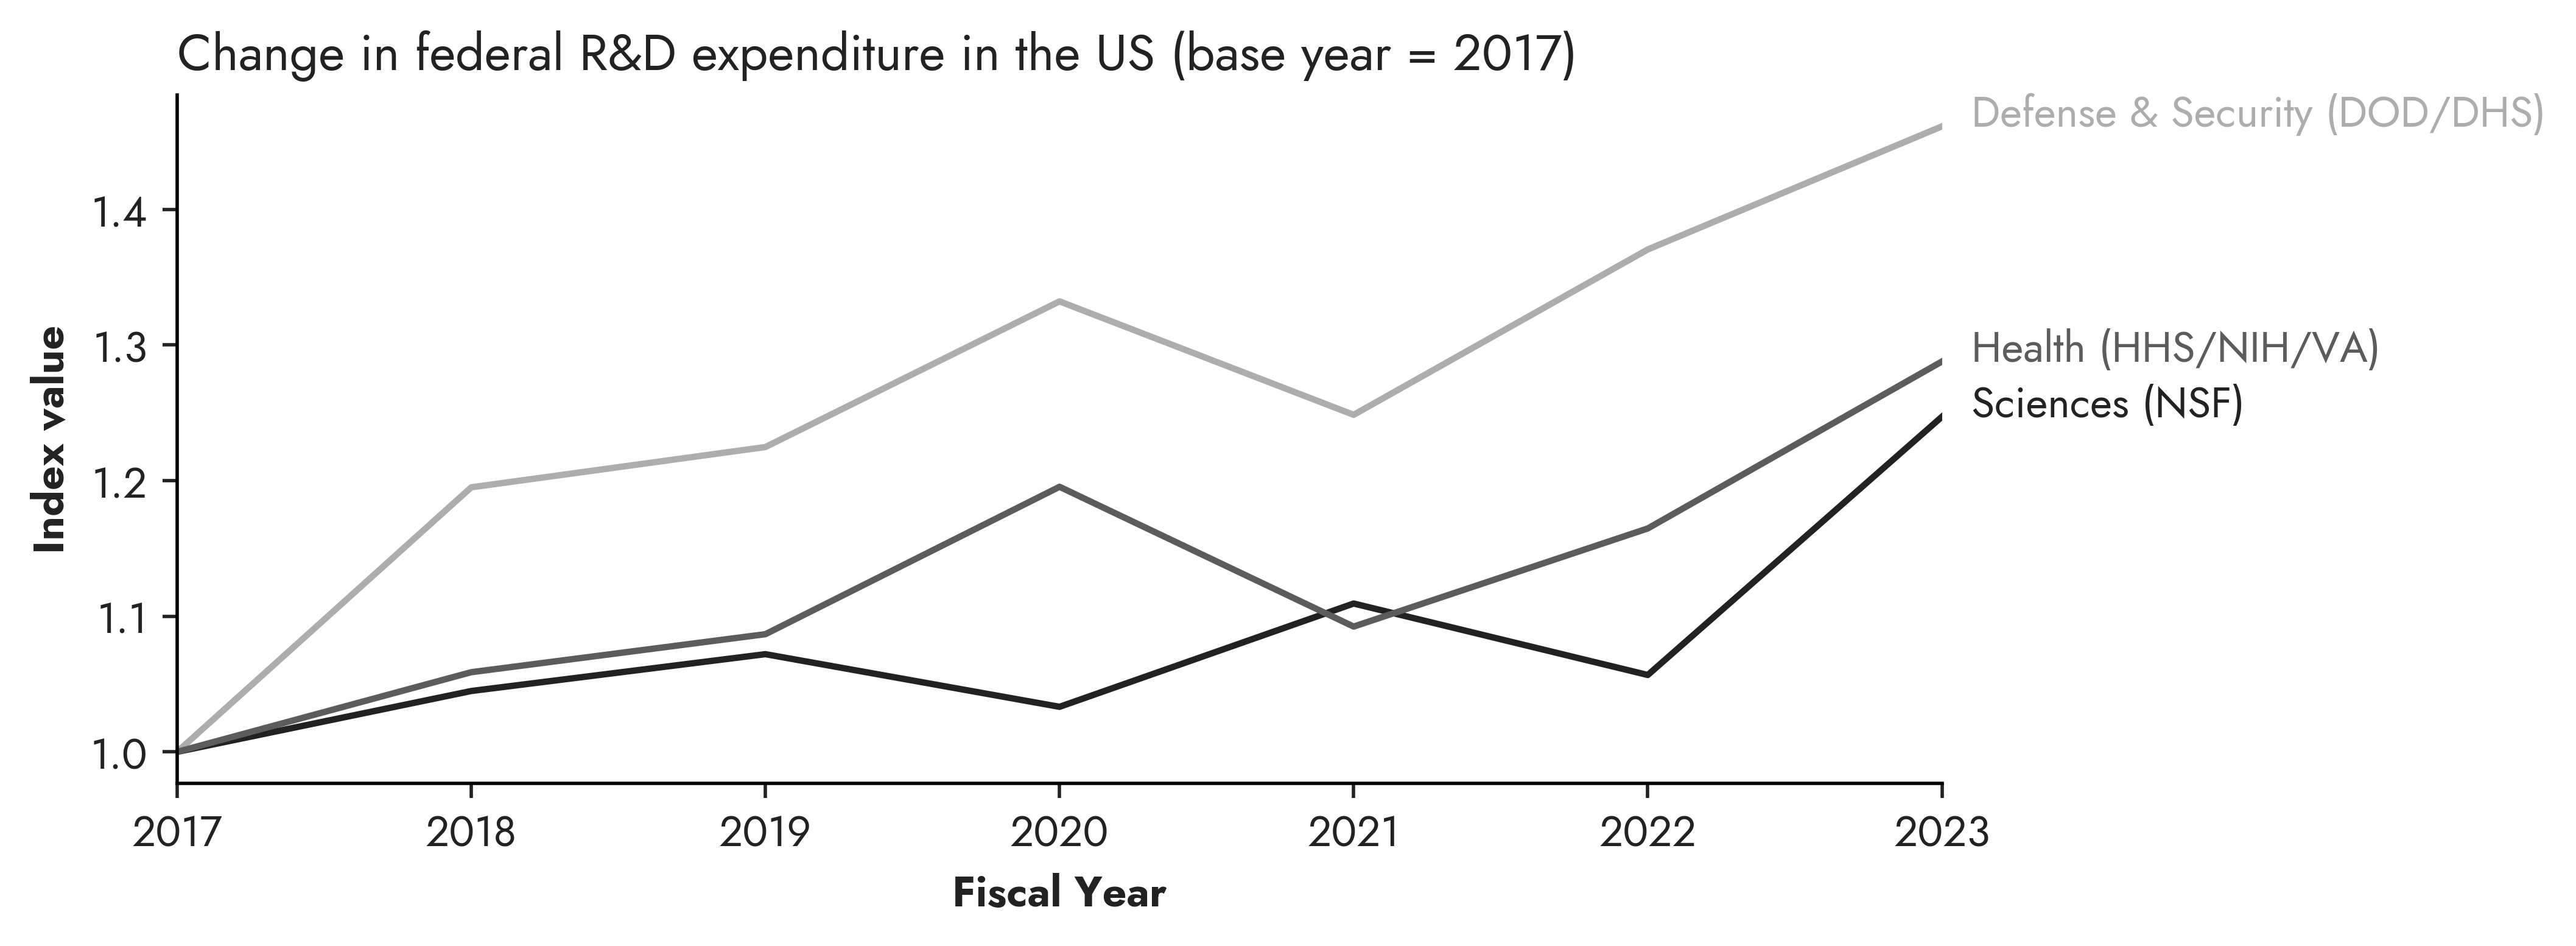

In [9]:
plt = prep_plot()
fig, ax = plt.subplots()

colors = [BLACK, GRAY2, GRAY1]
df_indexed.T.plot(kind='line', ax=ax, color=colors, legend=False)
ax.set_xlim(start_year, 2023)

for i, (cat, val) in enumerate(df_indexed[2023].items()):
    ax.text(s=cat, x=2023.1, y=val, color=colors[i])

ax.set_xlabel("Fiscal Year", weight='bold')
ax.set_ylabel("Index value", weight='bold')
ax.set_title("Change in federal R&D expenditure in the US (base year = 2017)", loc='left')

plt.savefig("gov_rd_agency_index.png", bbox_inches="tight")